In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Install required packages
!pip install tensorflow scikit-learn opencv-python


Mounted at /content/drive


In [ ]:
import tensorflow as tf

# Check if TensorFlow can access a GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import ResNet50, VGG16, InceptionV3
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess
from tensorflow.keras.applications.inception_v3 import preprocess_input as inception_preprocess
import datetime

# Image Directory
img_dir = '/content/drive/MyDrive/485Fashion'

# Model configurations for experimentation
model_configs = [
    {"name": "ResNet50", "class": ResNet50, "weights": ['imagenet', None], "preprocess_func": resnet_preprocess},
    {"name": "VGG16", "class": VGG16, "weights": ['imagenet', None], "preprocess_func": vgg_preprocess},
    {"name": "InceptionV3", "class": InceptionV3, "weights": ['imagenet', None], "preprocess_func": inception_preprocess}
]

# Feature extraction function with dynamic model initialization and preprocessing
def extract_features(model_class, weights, preprocess_func, img_dir):
    # Initialize the model
    model = model_class(weights=weights, include_top=False, pooling='avg')
    features, img_names = [], []

    # Process each image
    for img_file in os.listdir(img_dir):
        img_path = os.path.join(img_dir, img_file)
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_func(img_array)
        feature = model.predict(img_array)
        features.append(feature.flatten())
        img_names.append(img_file)

    return np.array(features), img_names

# Experiment with different models and weights
for config in model_configs:
    for weight in config["weights"]:
        # Perform feature extraction
        features, img_names = extract_features(config["class"], weight, config["preprocess_func"], img_dir)

        # Create a unique file name based on model name, weight type, and timestamp
        timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
        feature_filename = f'/content/drive/MyDrive/{config["name"]}_{weight}_{timestamp}_features.npy'
        img_names_filename = f'/content/drive/MyDrive/{config["name"]}_{weight}_{timestamp}_img_names.npy'

        # Save results
        np.save(feature_filename, features)
        np.save(img_names_filename, img_names)

        print(f'Saved features to {feature_filename} and image names to {img_names_filename}')


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1

Visualizing: ResNet50 - imagenet Features with PCA=30, t-SNE=2D


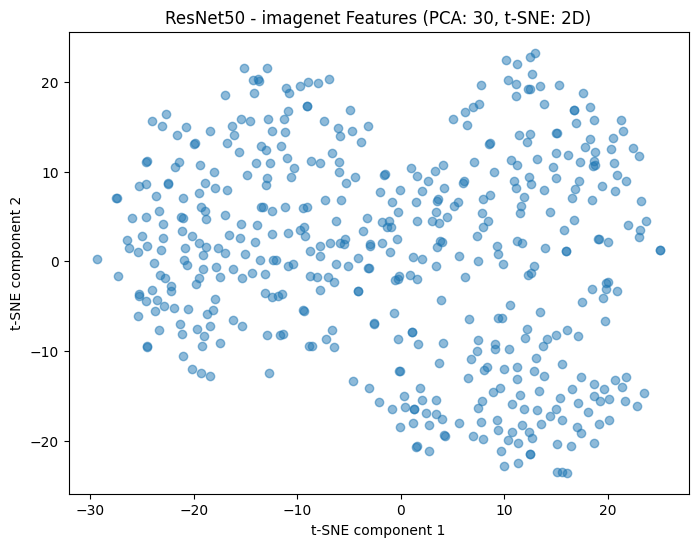

Visualizing: ResNet50 - imagenet Features with PCA=30, t-SNE=3D


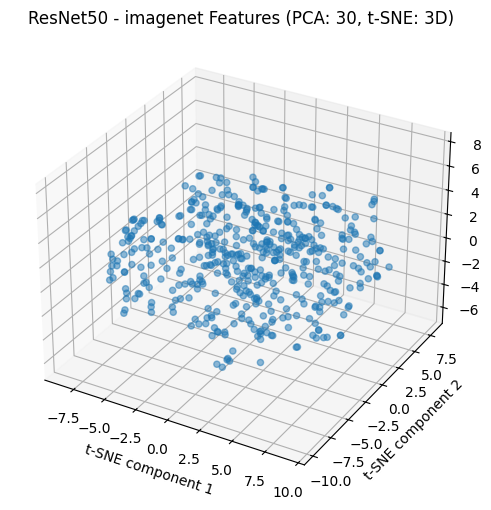

Visualizing: ResNet50 - imagenet Features with PCA=50, t-SNE=2D


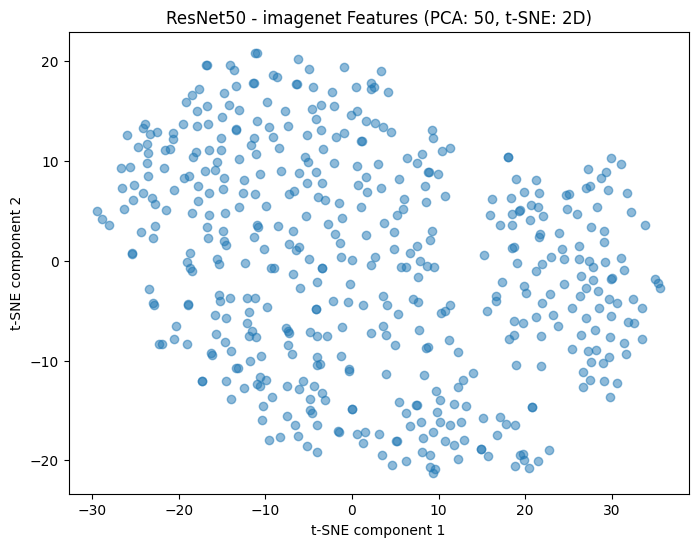

Visualizing: ResNet50 - imagenet Features with PCA=50, t-SNE=3D


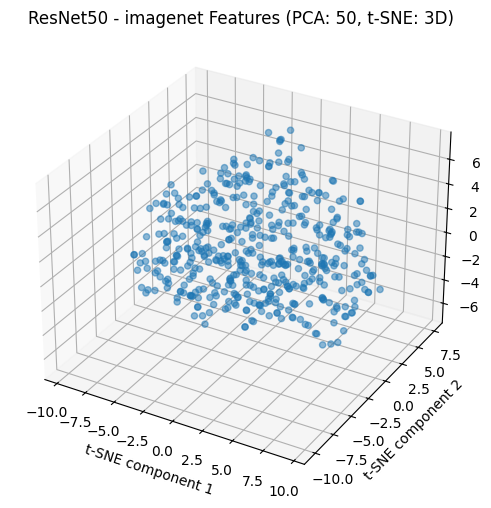

Visualizing: ResNet50 - imagenet Features with PCA=100, t-SNE=2D


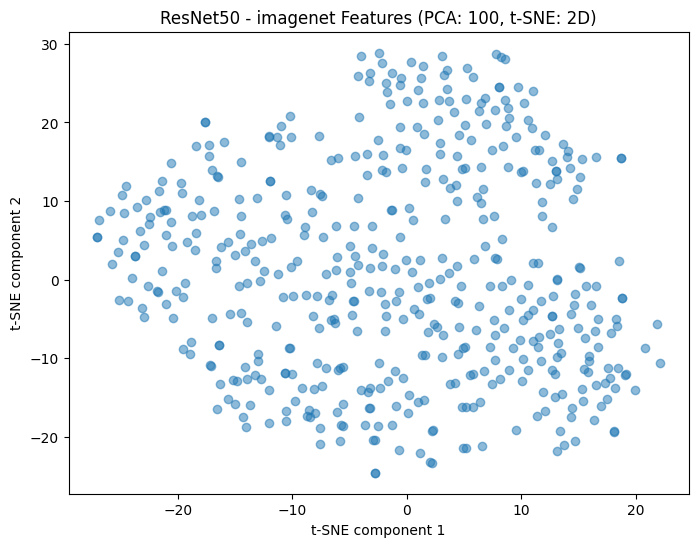

Visualizing: ResNet50 - imagenet Features with PCA=100, t-SNE=3D


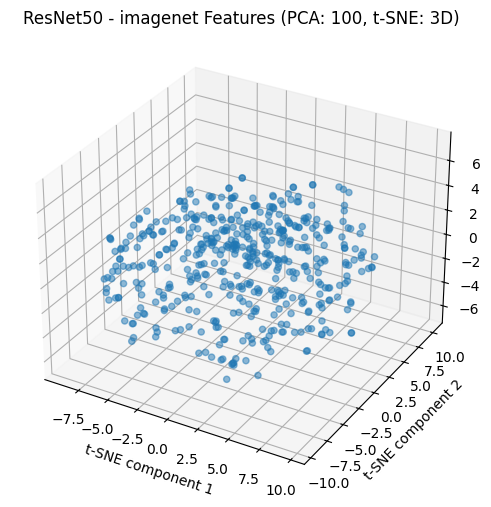

Visualizing: ResNet50 - None Features with PCA=30, t-SNE=2D


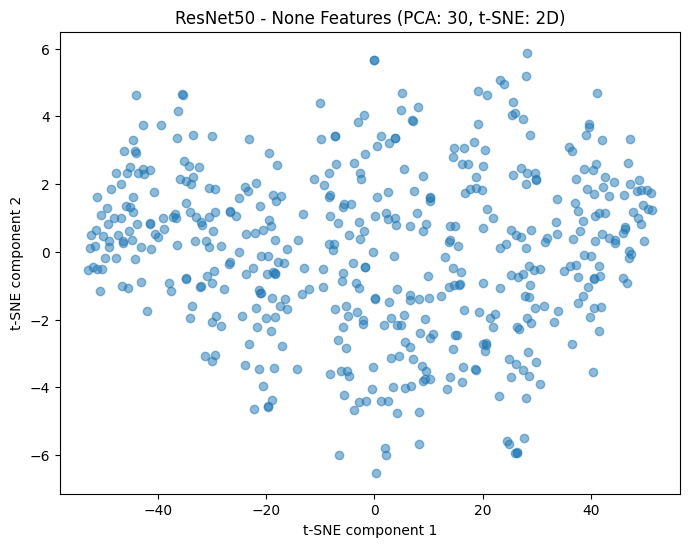

Visualizing: ResNet50 - None Features with PCA=30, t-SNE=3D


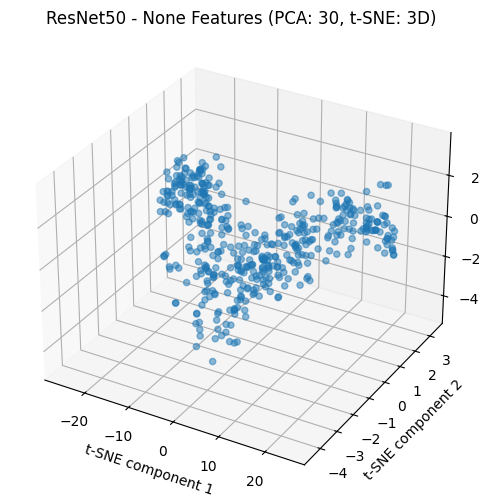

Visualizing: ResNet50 - None Features with PCA=50, t-SNE=2D


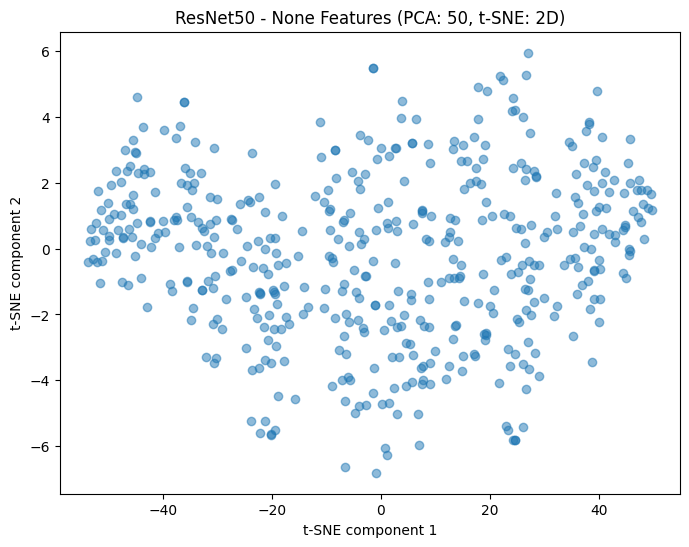

Visualizing: ResNet50 - None Features with PCA=50, t-SNE=3D


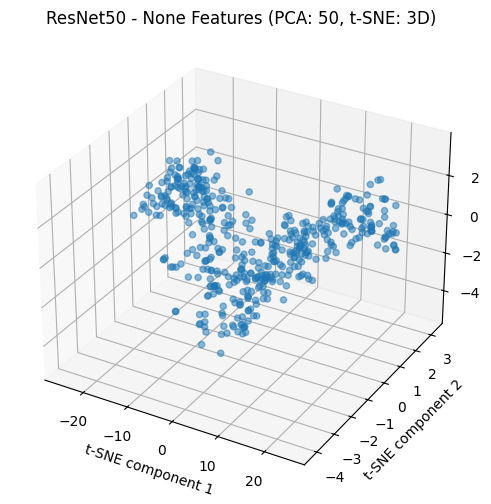

Visualizing: ResNet50 - None Features with PCA=100, t-SNE=2D


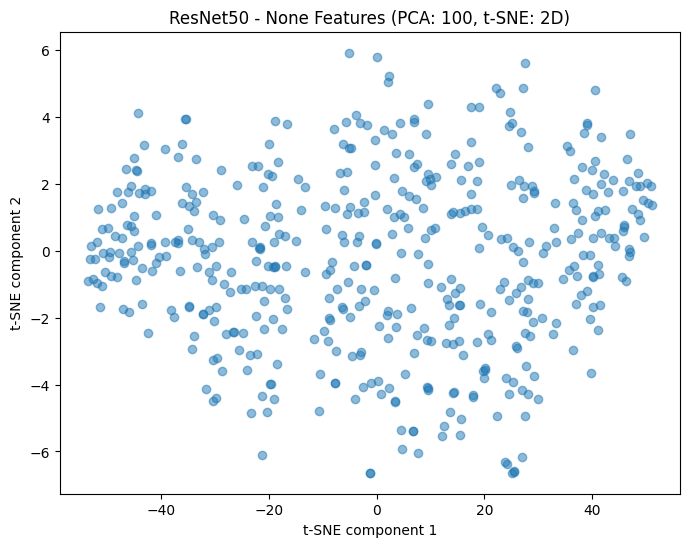

Visualizing: ResNet50 - None Features with PCA=100, t-SNE=3D


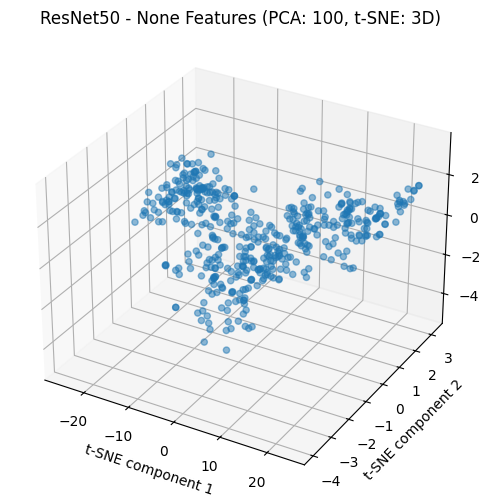

Visualizing: VGG16 - imagenet Features with PCA=30, t-SNE=2D


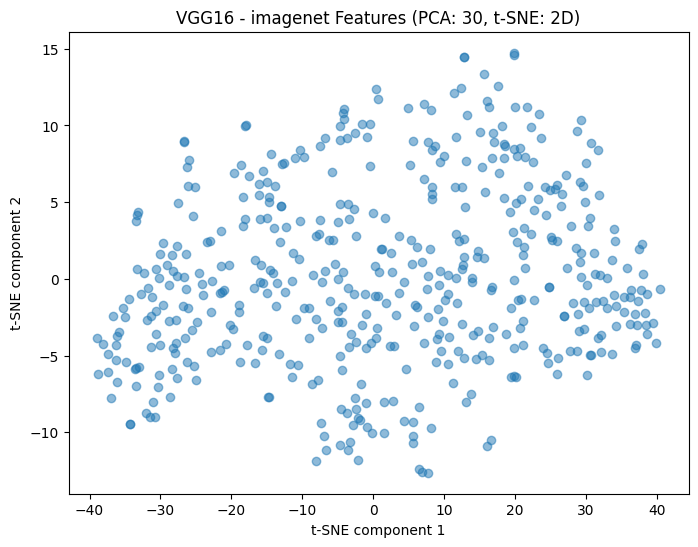

Visualizing: VGG16 - imagenet Features with PCA=30, t-SNE=3D


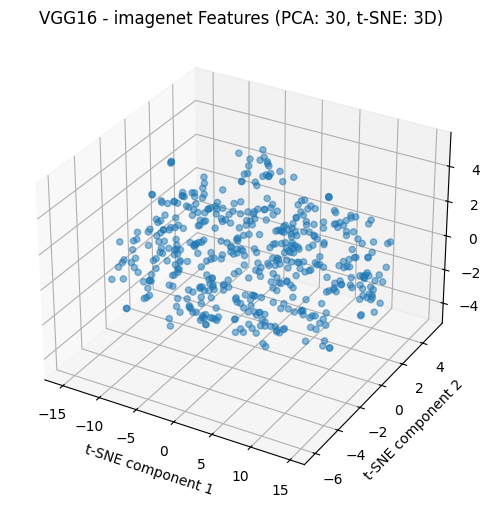

Visualizing: VGG16 - imagenet Features with PCA=50, t-SNE=2D


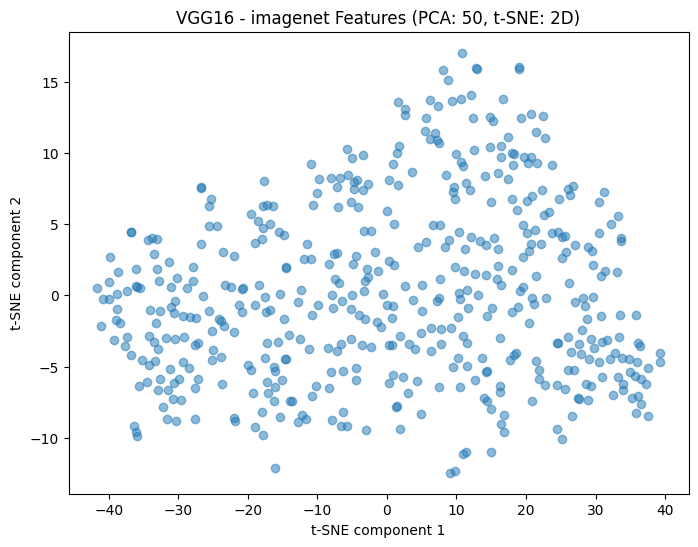

Visualizing: VGG16 - imagenet Features with PCA=50, t-SNE=3D


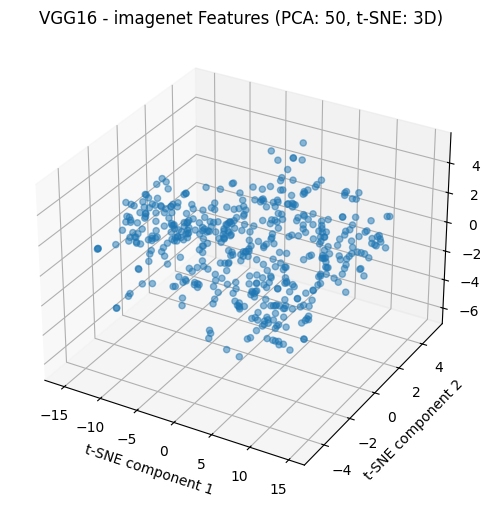

Visualizing: VGG16 - imagenet Features with PCA=100, t-SNE=2D


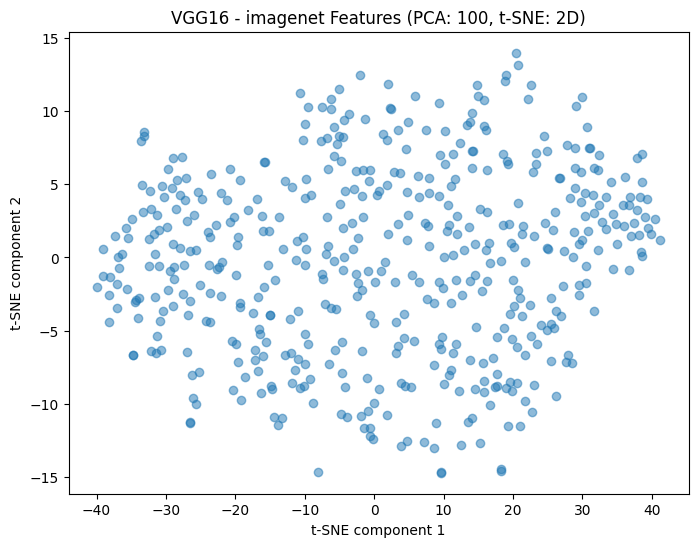

Visualizing: VGG16 - imagenet Features with PCA=100, t-SNE=3D


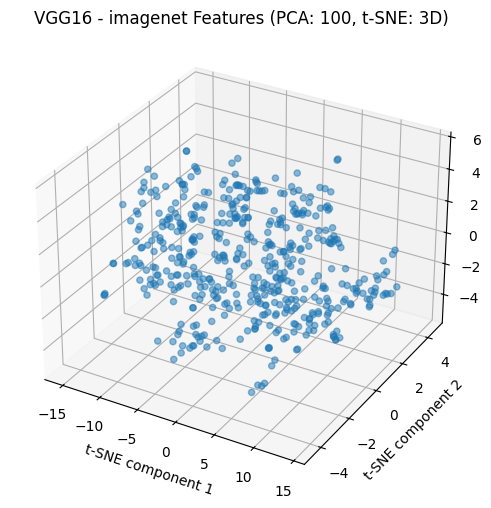

Visualizing: VGG16 - None Features with PCA=30, t-SNE=2D


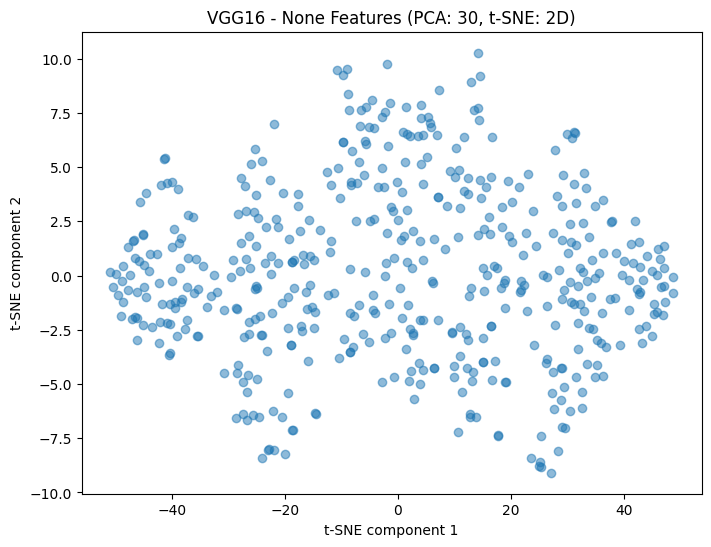

Visualizing: VGG16 - None Features with PCA=30, t-SNE=3D


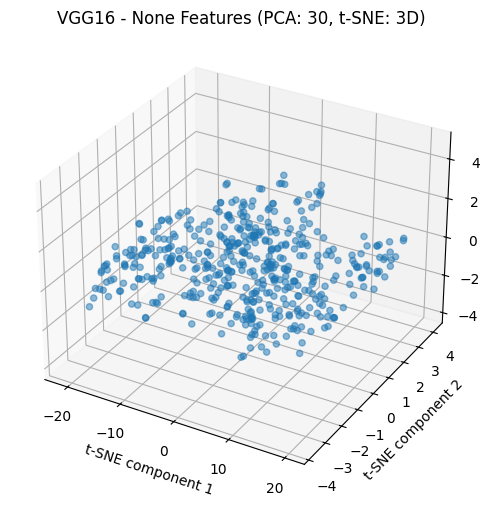

Visualizing: VGG16 - None Features with PCA=50, t-SNE=2D


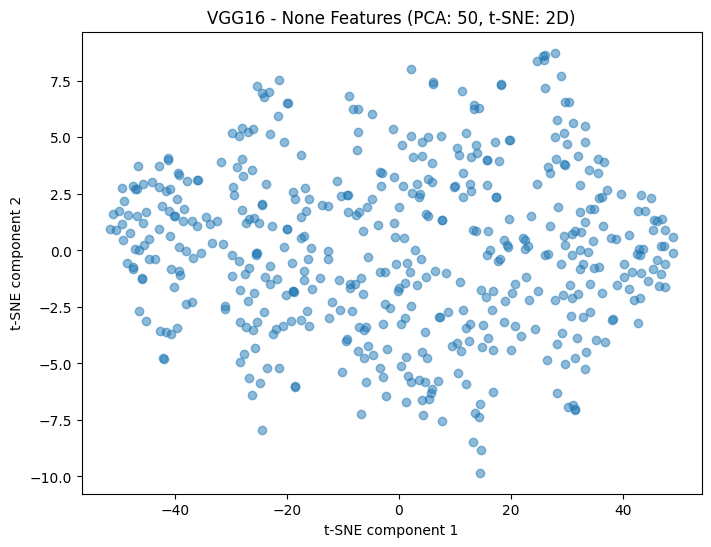

Visualizing: VGG16 - None Features with PCA=50, t-SNE=3D


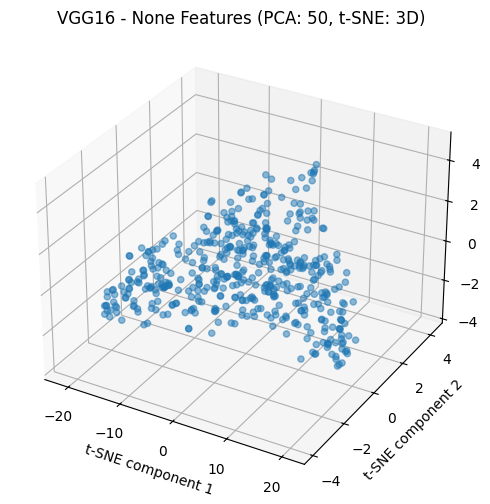

Visualizing: VGG16 - None Features with PCA=100, t-SNE=2D


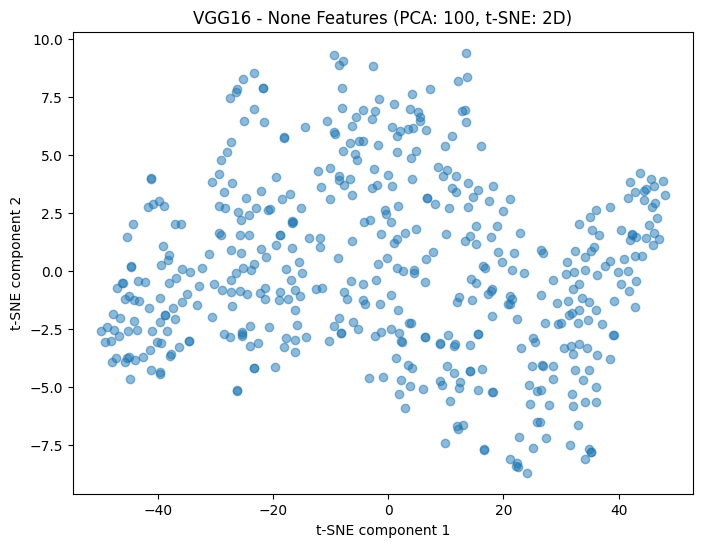

Visualizing: VGG16 - None Features with PCA=100, t-SNE=3D


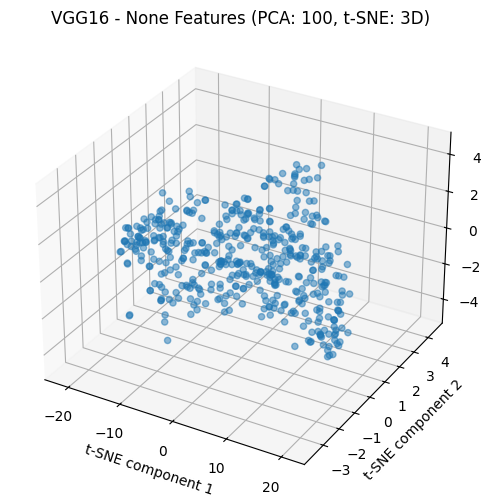

Visualizing: InceptionV3 - imagenet Features with PCA=30, t-SNE=2D


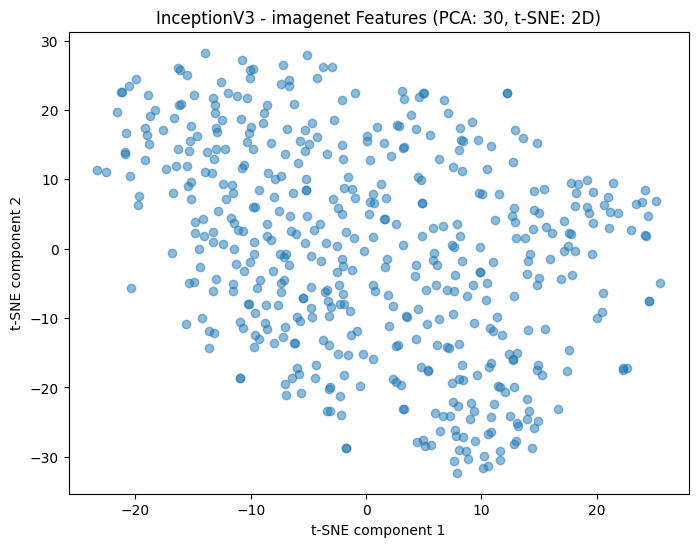

Visualizing: InceptionV3 - imagenet Features with PCA=30, t-SNE=3D


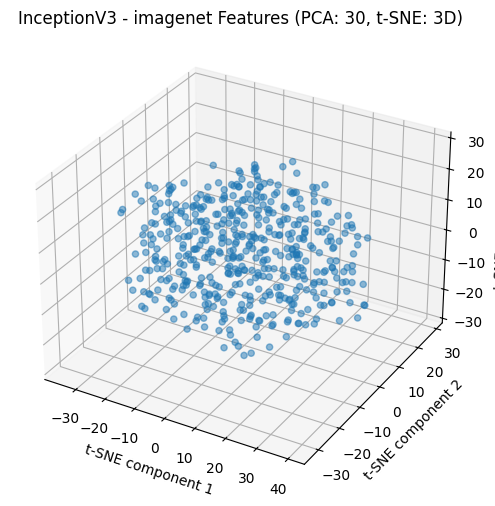

Visualizing: InceptionV3 - imagenet Features with PCA=50, t-SNE=2D


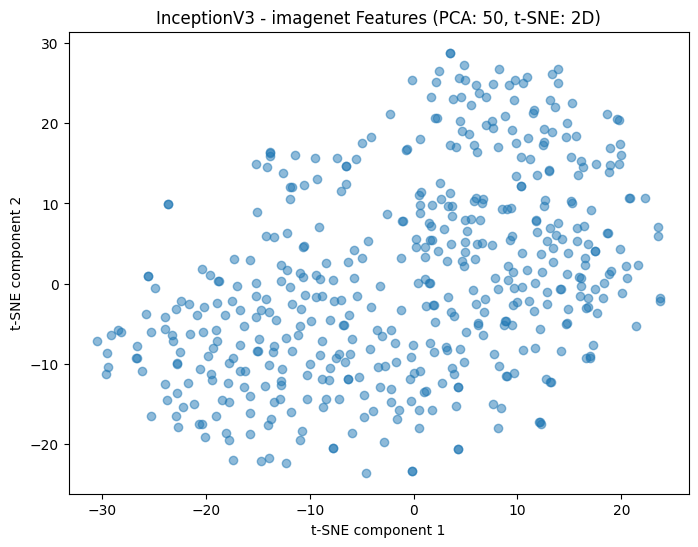

Visualizing: InceptionV3 - imagenet Features with PCA=50, t-SNE=3D


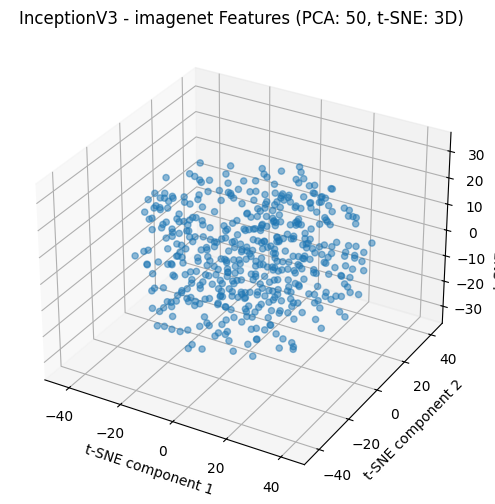

Visualizing: InceptionV3 - imagenet Features with PCA=100, t-SNE=2D


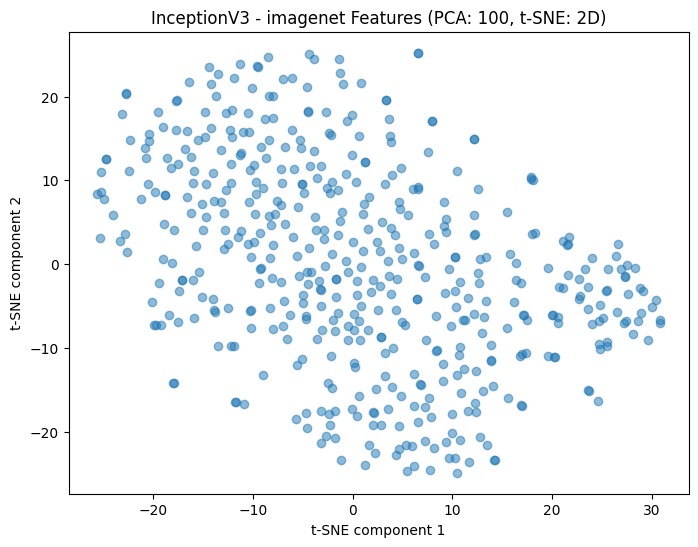

Visualizing: InceptionV3 - imagenet Features with PCA=100, t-SNE=3D


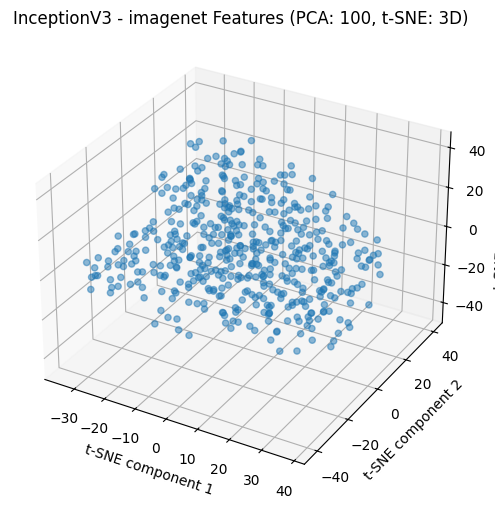

Visualizing: InceptionV3 - None Features with PCA=30, t-SNE=2D


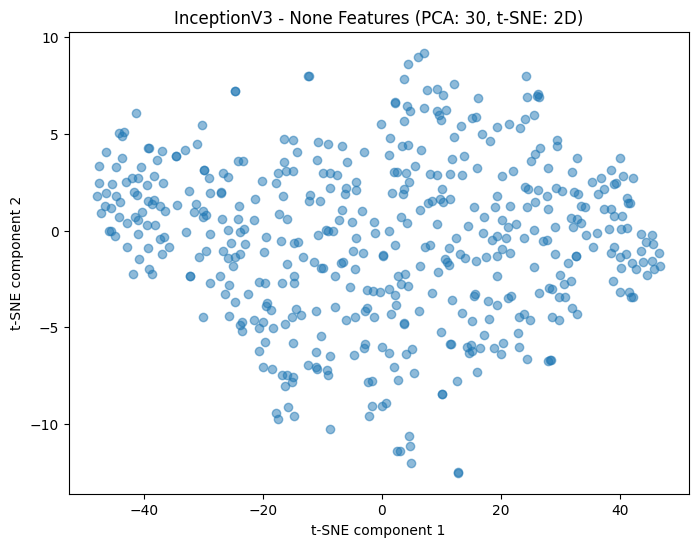

Visualizing: InceptionV3 - None Features with PCA=30, t-SNE=3D


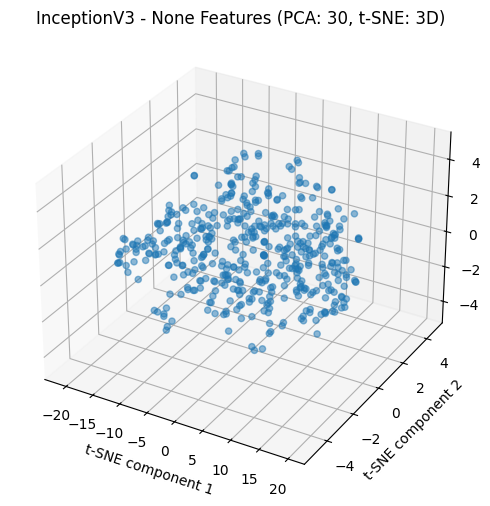

Visualizing: InceptionV3 - None Features with PCA=50, t-SNE=2D


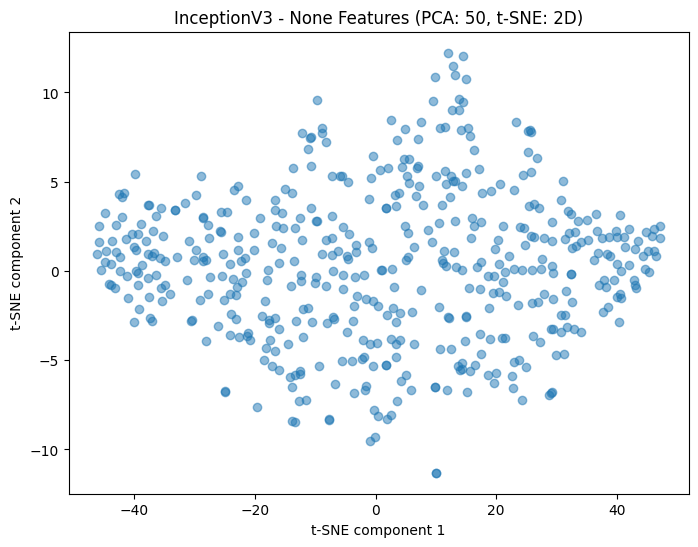

Visualizing: InceptionV3 - None Features with PCA=50, t-SNE=3D


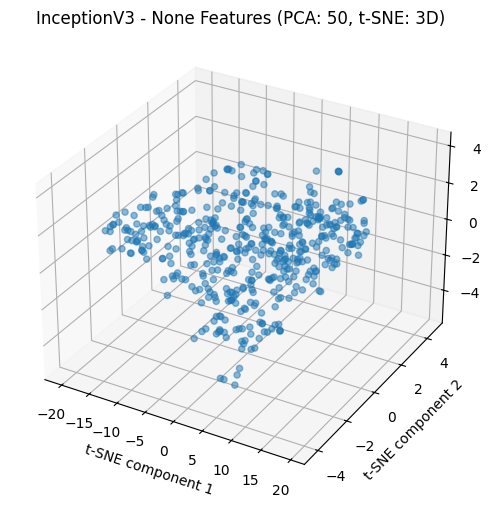

Visualizing: InceptionV3 - None Features with PCA=100, t-SNE=2D


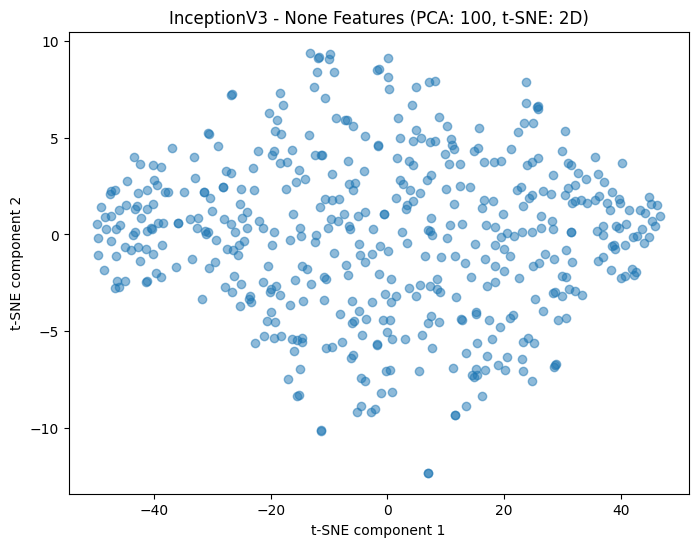

Visualizing: InceptionV3 - None Features with PCA=100, t-SNE=3D


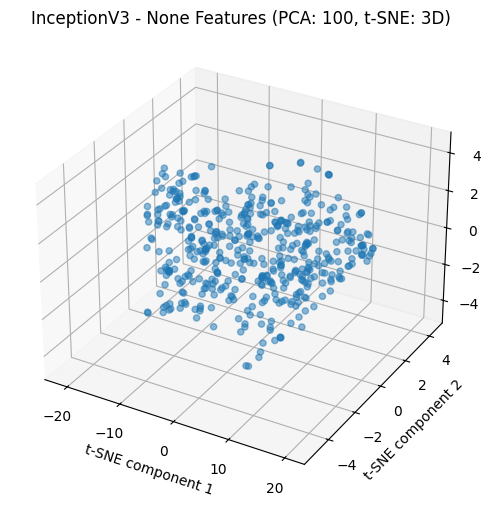

In [5]:
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
from glob import glob

# Define the directory where the feature files are saved
features_dir = '/content/drive/MyDrive/'

# Parameters to experiment with
pca_components_list = [30, 50, 100]     # Different PCA component settings
tsne_components_list = [2, 3]           # For 2D and 3D visualization

# Function to visualize t-SNE results in 2D or 3D
def visualize_tsne(features, pca_components, tsne_components, title="t-SNE visualization"):
    # Apply PCA
    pca = PCA(n_components=pca_components).fit_transform(features)
    tsne = TSNE(n_components=tsne_components).fit_transform(pca)

    # Plot
    fig = plt.figure(figsize=(8, 6))

    if tsne_components == 2:
        plt.scatter(tsne[:, 0], tsne[:, 1], alpha=0.5)
        plt.title(f"{title} (PCA: {pca_components}, t-SNE: {tsne_components}D)")
        plt.xlabel("t-SNE component 1")
        plt.ylabel("t-SNE component 2")
    elif tsne_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(tsne[:, 0], tsne[:, 1], tsne[:, 2], alpha=0.5)
        ax.set_title(f"{title} (PCA: {pca_components}, t-SNE: {tsne_components}D)")
        ax.set_xlabel("t-SNE component 1")
        ax.set_ylabel("t-SNE component 2")
        ax.set_zlabel("t-SNE component 3")

    plt.show()

# Load feature files dynamically
feature_files = glob(os.path.join(features_dir, '*_features.npy'))

# Iterate over each feature set and apply different PCA and t-SNE configurations
for feature_file in feature_files:
    # Load features
    features = np.load(feature_file)

    # Extract model and weight information from filename
    model_name = os.path.basename(feature_file).split('_')[0]
    weight_type = os.path.basename(feature_file).split('_')[1]

    for pca_components in pca_components_list:
        for tsne_components in tsne_components_list:
            # Set title based on parameters
            title = f"{model_name} - {weight_type} Features"
            print(f"Visualizing: {title} with PCA={pca_components}, t-SNE={tsne_components}D")

            # Visualize t-SNE with current settings
            visualize_tsne(features, pca_components, tsne_components, title)